In [1]:
import sys
sys.path.append('..')
sys.path.append('../../barplots/')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# import matplotlib.image as img
%matplotlib inline

from subplot_helpers import *
from stats import run_stats, create_log_file

from make_bins import make_bins

from defaults import *
from ee_group_info import *

from barplot_group_means import barplot_group_means

In [2]:
#------ DATA INFO - Fill in ------#

# Project
data_folder = "../data"
project = "Extended Extinction"
cohort = "EET"
rows_to_plot = ["EET"]
scorer = "hp"


#------ FIGURE INFO ------#
fig_folder = "../figures"
save_figs = True
colored_backgrounds=True
set_font_sizes(title_size, font_size)

In [3]:
#------ MAKE PATHS ------#
fig_subfolder = make_fig_subfolder(fig_folder)

log_filepath = create_log_file(
        fig_subfolder,
        cohort,
        scorer,
        project=project
    )

posthoc_filepath = create_log_file(
        fig_subfolder,
        cohort,
        scorer,
        project=project,
        filename='PAIRWISE.txt'
    )

data_file = os.path.join(data_folder, f'{cohort.lower()}-{scorer.lower()}.xlsx')

In [4]:
all_dfs = get_df_from_xlsx(data_file)
all_dfs.keys()

dict_keys(['1-AFC', '2-CFRT', '3-EXT1', '4-EXT2', '5-RET', '6-SR1', '7-SR2', '8-REN', '9-RST'])

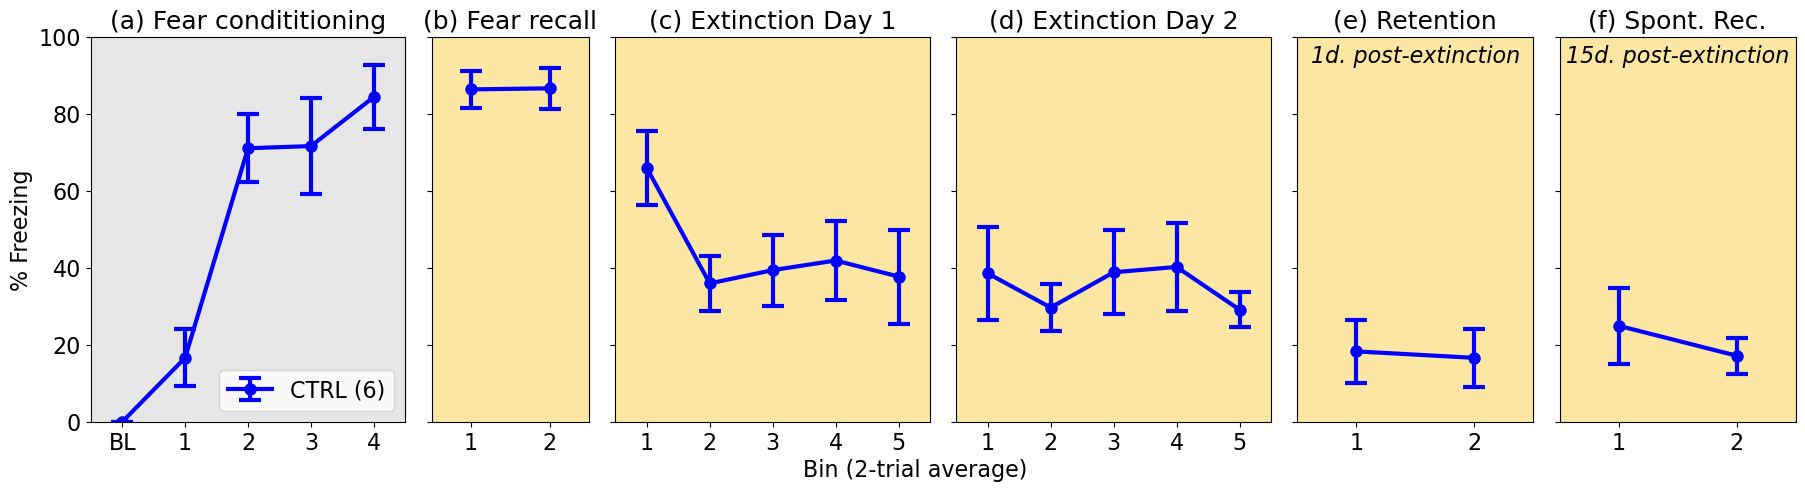

In [5]:
pickled_file = '../figures/2023-03-30/1/EET_hp-EET.pickle'

with open(pickled_file,'rb') as file:
    multi_fig = pickle.load(file)

In [6]:
cfrt = all_dfs['2-CFRT']

In [8]:
cfrt_means = cfrt.mean(axis=0)
cfrt_means

1    88.888889
2    83.888889
3    90.000000
4    83.333333
dtype: float64

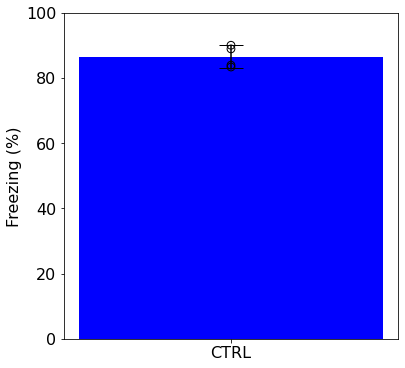

In [9]:
fig_cfrt, ax_cfrt = barplot_group_means(cfrt_means, lbls=['CTRL'])

In [10]:
barplot_group_means(
    cfrt_means,
    lbls=['CTRL'],
    fig=multi_fig,
    ax=multi_fig.axes[1],
    ylbl=None,
    title=multi_fig.axes[1].get_title(),
)

(<Figure size 2200x500 with 6 Axes>,
 <AxesSubplot:title={'center':'(b) Fear recall'}>)

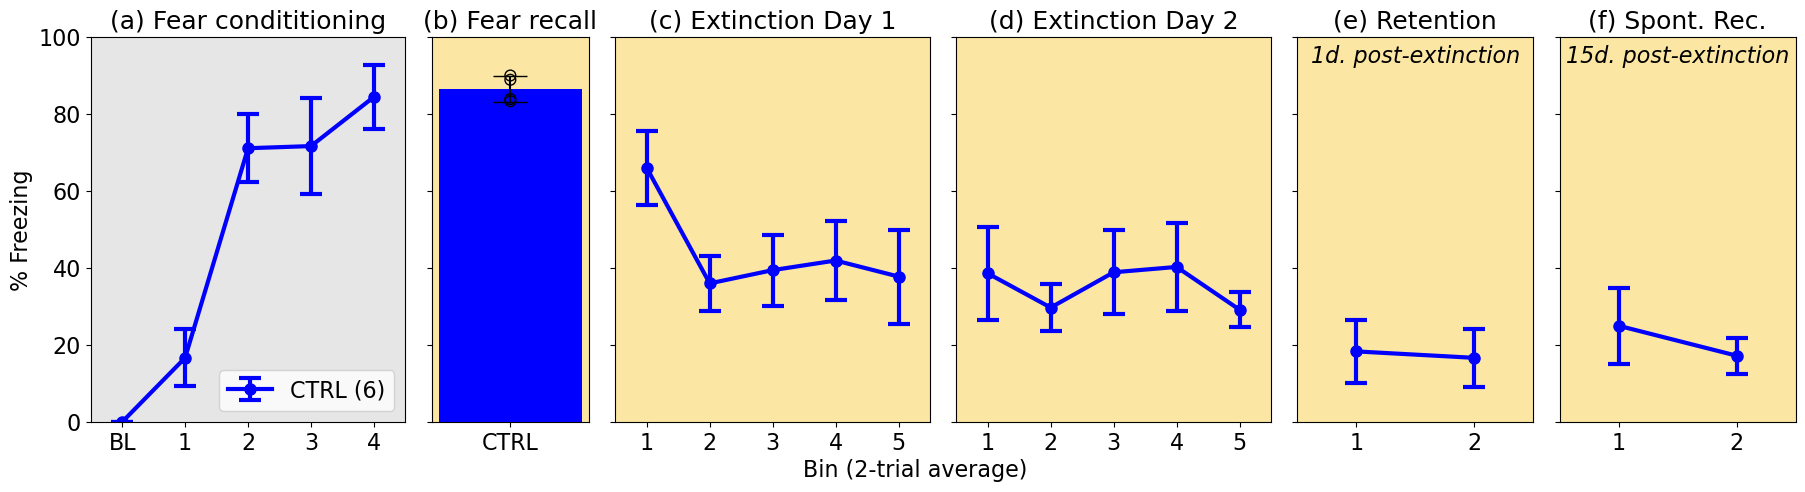

In [11]:
multi_fig